# Importing the Libraries to accomplish our goal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Fetching Data

In [2]:
sales_df = pd.read_csv('Train.csv')
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# finding the insights of data
sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
sales_df.shape

(8523, 12)

In [6]:
sales_df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
cat_col = []
for x in sales_df.dtypes.index:
    if sales_df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
for col in cat_col:
    print(col)
    print('________________________')
    print(sales_df[col].value_counts())
    print()
    print('________________________')

Item_Fat_Content
________________________
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

________________________
Item_Type
________________________
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

________________________
Outlet_Size
________________________
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

________________________
Outlet_Location_Type
________________________
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_

## Data Preprocessing

### Process on Item_Weight 

In [11]:
# finding the mean value of Item Weight with respect to Item Identifier and saving it into mean_Item_Weight
mean_Item_Weight = sales_df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
mean_Item_Weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
# finding the null value in Item_Weight and save it into miss_bool
miss_bool = sales_df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [13]:
# filling the null value in item_Weight
for i, item in enumerate(sales_df['Item_Identifier']):
    if miss_bool[i]:
        if item in mean_Item_Weight:
            sales_df['Item_Weight'][i] = mean_Item_Weight.loc[item]['Item_Weight']
        else:
            sales_df['Item_Weight'][i] = np.mean(sales_df['Item_Weight'])

In [14]:
sales_df['Item_Weight'].isnull().sum()

0

### Process on Outlet_Size

In [15]:
# finding the mode value in Outlet_Size with respect to Outlet_Type and saving it into OS_mode
OS_mode = sales_df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))
OS_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
# finding the null values of Outlet_Size and saving it into miss_bool
miss_bool = sales_df['Outlet_Size'].isnull()
miss_bool

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [17]:
# filing the null values of Outlet_Size which we saved into OS_mode through apply function
sales_df.loc[miss_bool, 'Outlet_Size'] = sales_df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: OS_mode[x])

In [18]:
sales_df['Outlet_Size'].isnull().sum()

0

### Process on Item_Visibility

In [19]:
# finding the 0 values in item_Visibility
sum(sales_df['Item_Visibility']==0)

526

In [20]:
# replacing the 0 value in item_Visibility with mean of item_visibility
sales_df.loc[:, 'Item_Visibility'].replace([0], [sales_df['Item_Visibility'].mean()], inplace = True)

In [21]:
sum(sales_df['Item_Visibility']==0)

0

### Process on Item_Fat_Content

In [22]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
# replacing the same values with different names to unique values
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [24]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
# fetching the starting 2 values of Item_Identifier column and saving it into New column New_Item_Type
sales_df['New_Item_Type'] = sales_df['Item_Identifier'].apply(lambda x: x[:2])

In [26]:
sales_df['New_Item_Type'].value_counts()

FD    6125
NC    1599
DR     799
Name: New_Item_Type, dtype: int64

In [27]:
# replace the values in New_Item_Type to appropriate name
sales_df['New_Item_Type'] = sales_df['New_Item_Type'].replace({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drink'})
sales_df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: New_Item_Type, dtype: int64

In [28]:
# changing the value (Non-Edible) in Item_Fat_Content with respect to New_Item_Type 
sales_df.loc[sales_df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
sales_df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

### process on Establishment_Year_Column 

In [29]:
sales_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [30]:
# max value in Outlet_Establishment_Year
sales_df['Outlet_Establishment_Year'].max()

2009

In [31]:
# min value in Outlet_Establishment_Year
sales_df['Outlet_Establishment_Year'].min()

1985

### Process on Outlet_Establishment_Year and saving it into Outlet_Year

In [32]:
sales_df['Outlet_Year'] = 2010 - sales_df['Outlet_Establishment_Year']

In [33]:
sales_df['Outlet_Year'].value_counts()

25    1463
23     932
11     930
13     930
6      930
8      929
1      928
3      926
12     555
Name: Outlet_Year, dtype: int64

In [34]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,11
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,11
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,12
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,23


In [35]:
cat_col = []
for x in sales_df.dtypes.index:
    if sales_df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'New_Item_Type']

In [36]:
num_col = []
for x in sales_df.dtypes.index:
    if sales_df.dtypes[x] != 'object':
        num_col.append(x)
num_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Outlet_Year']

## Visulaization of Data

In [37]:
import seaborn as sns

<Axes: xlabel='Item_Weight', ylabel='Density'>

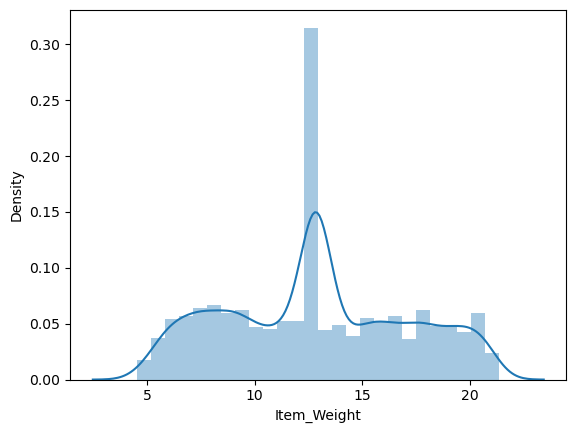

In [38]:
sns.distplot(sales_df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

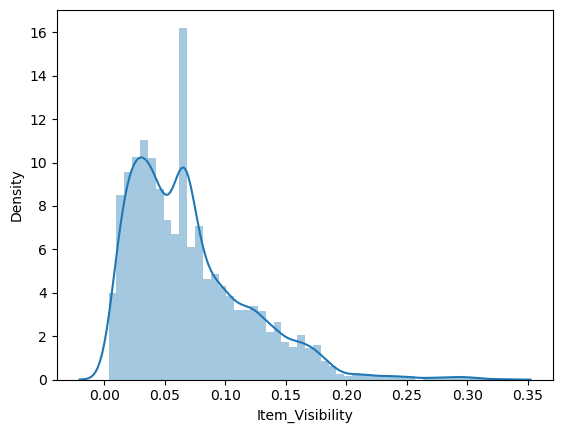

In [39]:
sns.distplot(sales_df['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

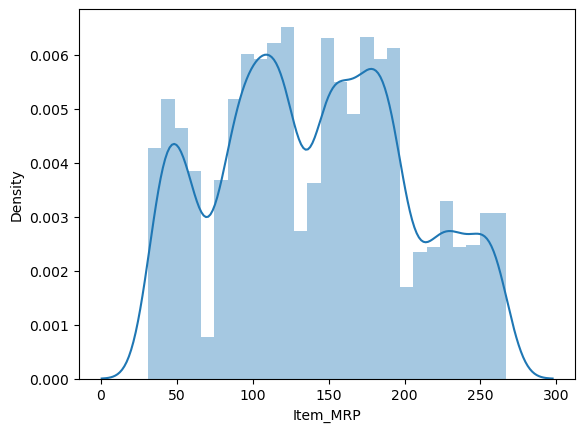

In [40]:
sns.distplot(sales_df['Item_MRP'])

In [41]:
sales_df['Item_MRP'] = np.log(1+sales_df['Item_MRP'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

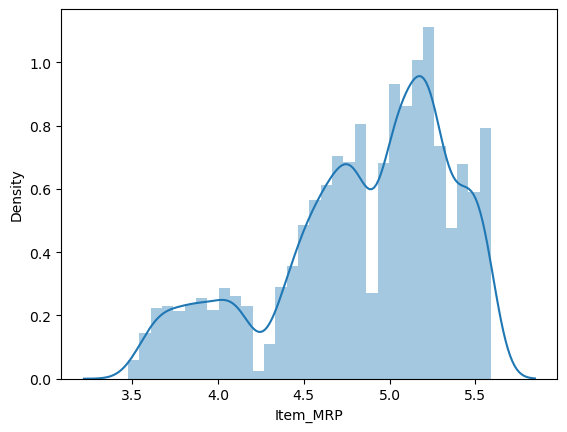

In [42]:
sns.distplot(sales_df['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

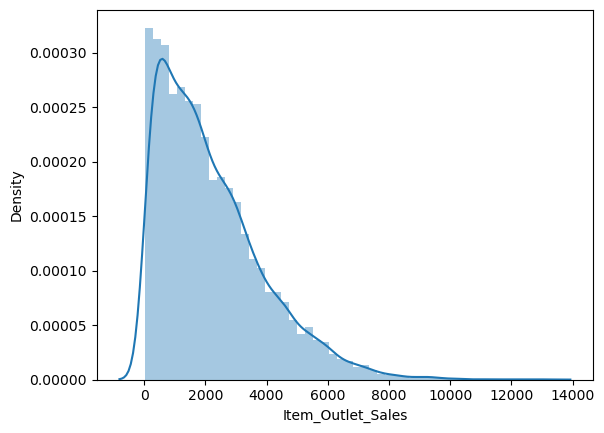

In [43]:
sns.distplot(sales_df['Item_Outlet_Sales'])

In [44]:
sales_df['Item_Outlet_Sales'] = np.log(1+sales_df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

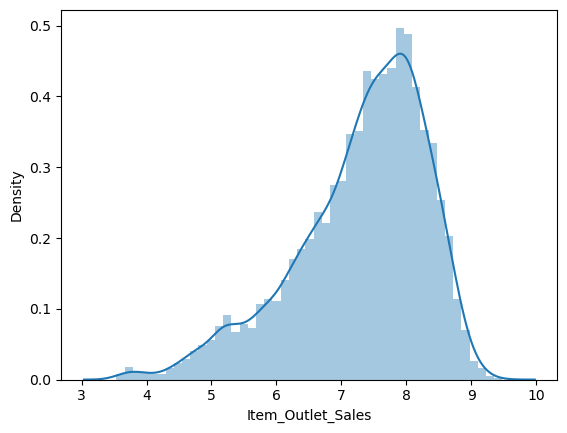

In [45]:
sns.distplot(sales_df['Item_Outlet_Sales'])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Density'>

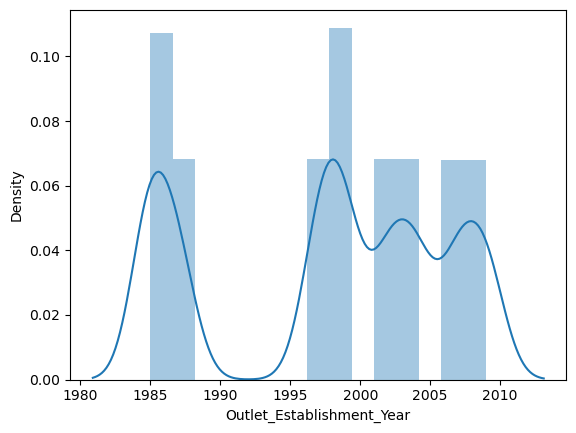

In [46]:
sns.distplot(sales_df['Outlet_Establishment_Year'])

<Axes: xlabel='Outlet_Year', ylabel='Density'>

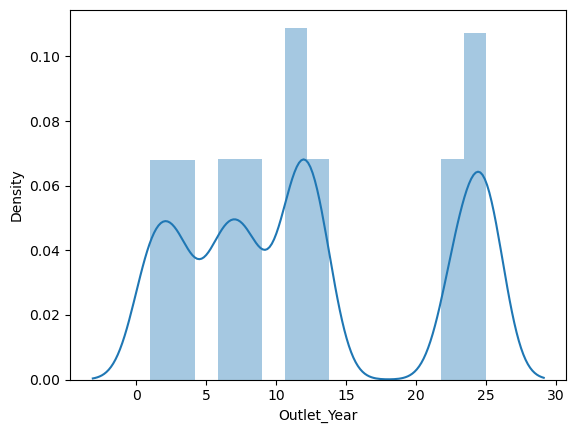

In [47]:
sns.distplot(sales_df['Outlet_Year'])

<Axes: xlabel='Outlet_Year', ylabel='count'>

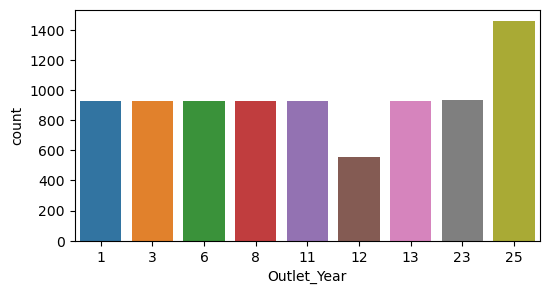

In [48]:
# sns.countplot(x = "Outlet_Establishment_Year", data = df)
plt.figure(figsize = (6,3))
sns.countplot(x = 'Outlet_Year', data = sales_df)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

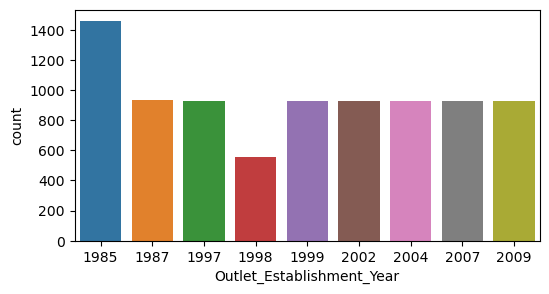

In [49]:
plt.figure(figsize = (6,3))
sns.countplot(x = "Outlet_Establishment_Year", data = sales_df)

In [50]:
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'New_Item_Type']

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

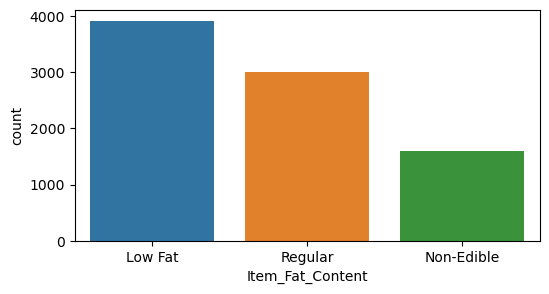

In [51]:
plt.figure(figsize = (6,3))
sns.countplot(x = "Item_Fat_Content", data = sales_df)

<Axes: xlabel='Outlet_Identifier', ylabel='count'>

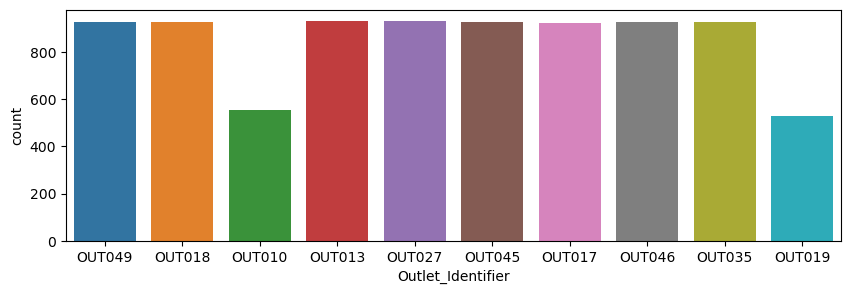

In [52]:
plt.figure(figsize = (10,3))
sns.countplot(x = "Outlet_Identifier", data = sales_df)

<Axes: xlabel='Outlet_Size', ylabel='count'>

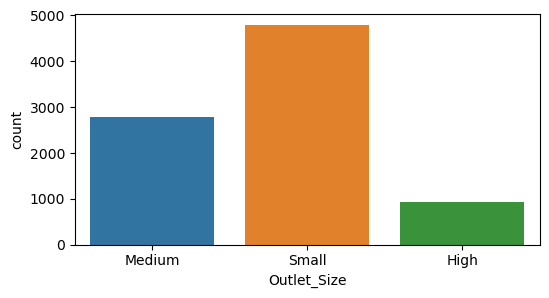

In [53]:
plt.figure(figsize = (6,3))
sns.countplot(x = "Outlet_Size", data = sales_df)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

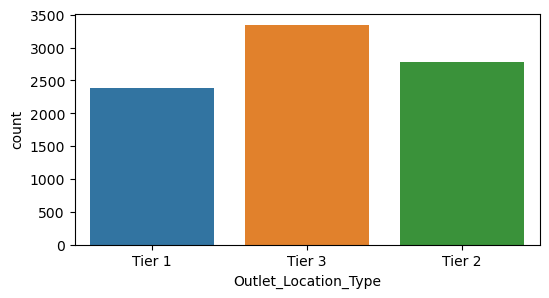

In [54]:
plt.figure(figsize = (6,3))
sns.countplot(x = "Outlet_Location_Type", data = sales_df)

<Axes: xlabel='Outlet_Type', ylabel='count'>

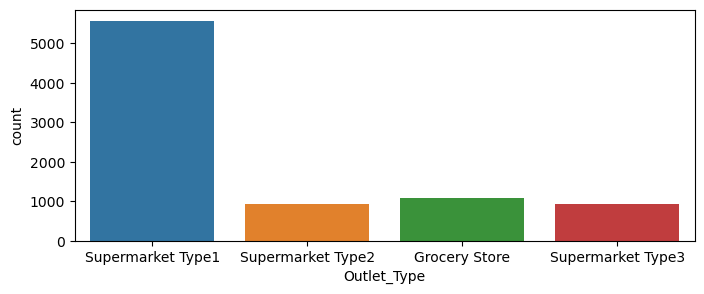

In [55]:
plt.figure(figsize = (8,3))
sns.countplot(x = "Outlet_Type", data = sales_df)

<Axes: xlabel='New_Item_Type', ylabel='count'>

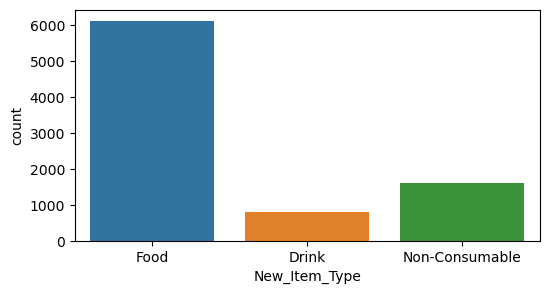

In [56]:
plt.figure(figsize = (6,3))
sns.countplot(x = "New_Item_Type", data = sales_df)

<Axes: >

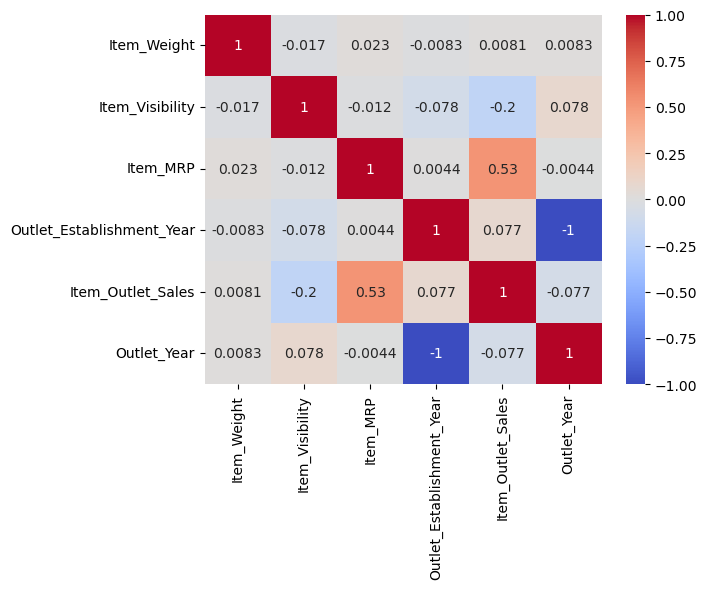

In [57]:
corr = sales_df.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

### Data Preprocessing to Fit the model

#### Label Encoding ot Outlet_Identifier

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sales_df['Outlet_Identifier'] = le.fit_transform(sales_df['Outlet_Identifier'])

In [59]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,5.524692,9,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,11
1,DRC01,5.92,Regular,0.019278,Soft Drinks,3.897299,3,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drink,1
2,FDN15,17.50,Low Fat,0.016760,Meat,4.960170,9,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,11
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,5.210005,0,1998,Small,Tier 3,Grocery Store,6.597664,Food,12
4,NCD19,8.93,Non-Edible,0.066132,Household,4.004810,1,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,23


In [60]:
sales_df['Item_Type'].nunique()

16

In [61]:
sales_df.drop(['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year'], axis = 1, inplace = True)

In [62]:
for col in sales_df:
    print(col)
    print('-------------------------------')
    print(sales_df[col].value_counts())
    print()
    print('-------------------------------')

Item_Weight
-------------------------------
12.857645    921
12.857645    358
12.857645    184
12.150000     86
17.600000     82
            ... 
6.405000       2
7.685000       1
9.420000       1
6.520000       1
5.400000       1
Name: Item_Weight, Length: 418, dtype: int64

-------------------------------
Item_Fat_Content
-------------------------------
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

-------------------------------
Item_Visibility
-------------------------------
0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

-------------------------------
Item_MRP
-------------------------------
5.153535    7
5.144829    6
5.285781    6
5.242737    6
4.962952    6
           ..
4.588415    1
4.433117    1
4.581648    1
5.034796    1
4.336859    1
Name: Item_MR

In [63]:
sales_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year
0,9.30,Low Fat,0.016047,5.524692,9,Medium,Tier 1,Supermarket Type1,8.225808,Food,11
1,5.92,Regular,0.019278,3.897299,3,Medium,Tier 3,Supermarket Type2,6.096776,Drink,1
2,17.50,Low Fat,0.016760,4.960170,9,Medium,Tier 1,Supermarket Type1,7.648868,Food,11
3,19.20,Regular,0.066132,5.210005,0,Small,Tier 3,Grocery Store,6.597664,Food,12
4,8.93,Non-Edible,0.066132,4.004810,1,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,23


#### One Hot Encoding on Categorical columns

In [64]:
sales_df = pd.get_dummies(sales_df, columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])

In [65]:
sales_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drink,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,9.30,0.016047,5.524692,9,8.225808,11,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,3.897299,3,6.096776,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,4.960170,9,7.648868,11,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.066132,5.210005,0,6.597664,12,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.066132,4.004810,1,6.903451,23,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


## Splitting of data for Model Implementation 

In [66]:
X = sales_df.drop('Item_Outlet_Sales', axis = 1)
y = sales_df['Item_Outlet_Sales']

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):
    model.fit(X, y)
    
    pred = model.predict(X)
    cv_score = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

## Linear Model Regression

Model Report
MSE: 0.26625299120676255
CV Score: 0.267201902216437


<Axes: title={'center': 'Model Coefficients'}>

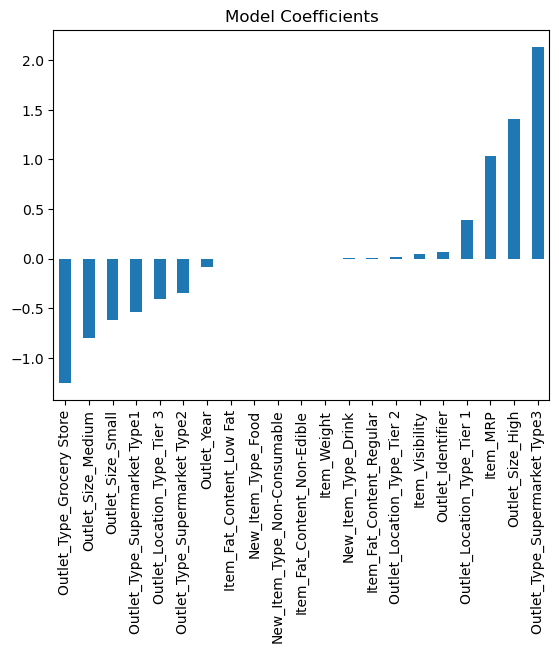

In [68]:
from sklearn.linear_model import LinearRegression, Ridge
model1 = LinearRegression()
train(model1, X, y)
coef = pd.Series(model1.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

## Ridge Regression Model

Model Report
MSE: 0.26642600099194214
CV Score: 0.26735924143973866


<Axes: title={'center': 'Model Coefficients'}>

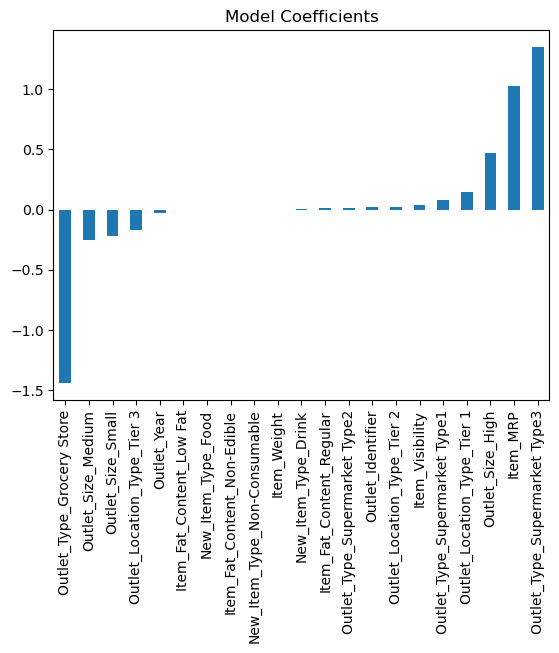

In [69]:
model2 = Ridge()
train(model2, X, y)
coef = pd.Series(model2.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

## Decision Tree Regressor Model

Model Report
MSE: 8.330104595786819e-34
CV Score: 0.5759005934125366


<Axes: title={'center': 'Feature Importance'}>

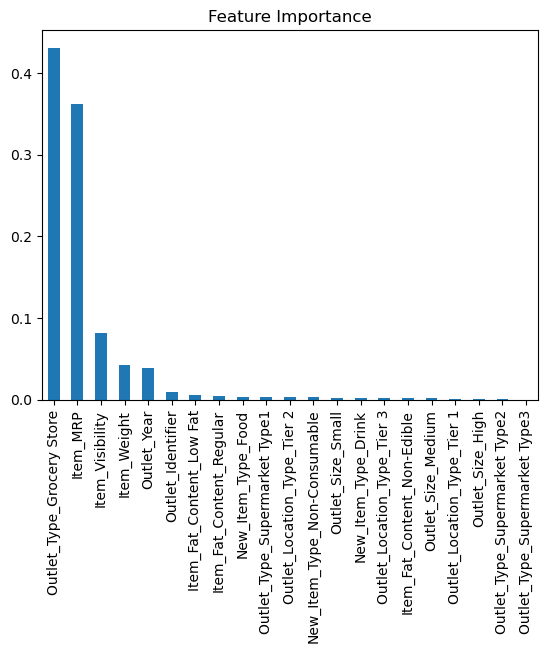

In [70]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()
train(model3, X, y)
coef = pd.Series(model3.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

## Random Forest Regressor Model

Model Report
MSE: 0.042743608628873615
CV Score: 0.31275528933001623


<Axes: title={'center': 'Feature Importance'}>

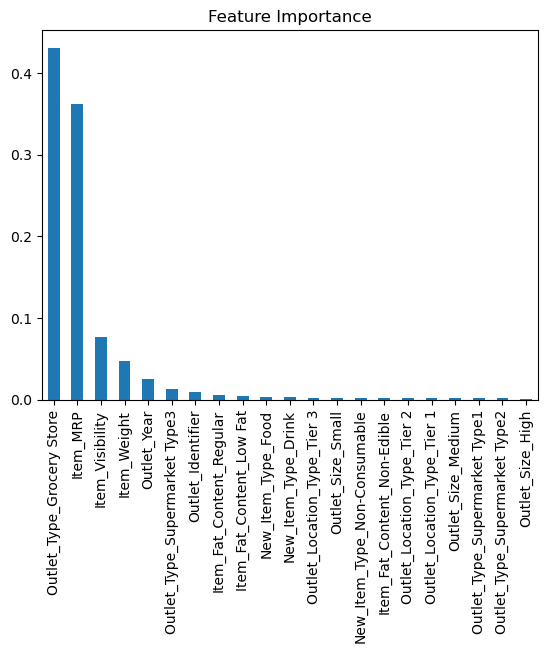

In [71]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor()
train(model4, X, y)
coef = pd.Series(model4.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

## Extra Tree Regressor Model

Model Report
MSE: 1.0418489584965893e-28
CV Score: 0.33697094100194214


<Axes: title={'center': 'Feature Importance'}>

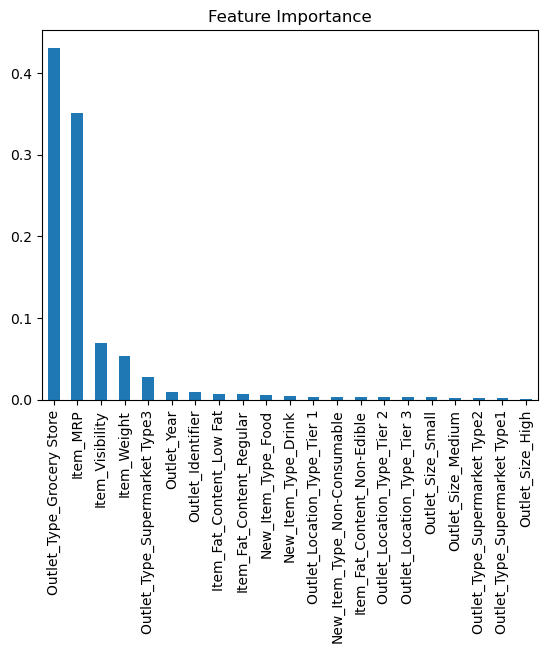

In [72]:
from sklearn.ensemble import ExtraTreesRegressor
model5 = ExtraTreesRegressor()
train(model5, X, y)
coef = pd.Series(model5.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

## Extra Gradient Boost Regressor Model

In [73]:
import xgboost as xgb

[07:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

<Axes: title={'center': 'Feature Importance'}>

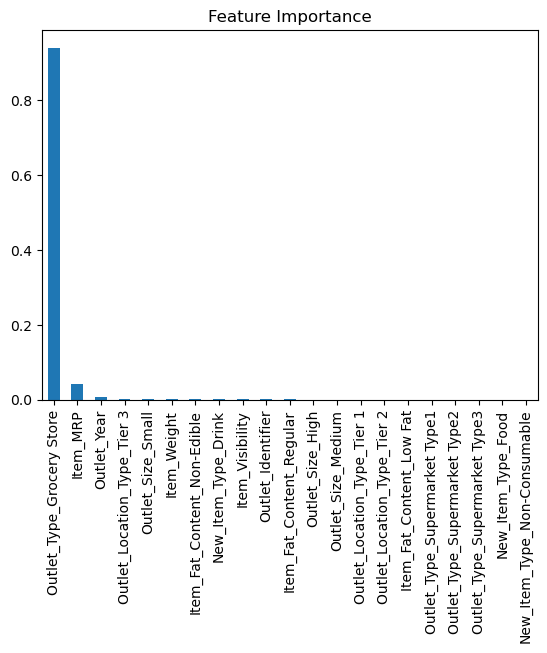

In [74]:
model6 = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
train(model6, X, y)
coef = pd.Series(model6.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

## Conclusion 

In [75]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Ridge Regression','Decision Tree Regressor', 'Random Forest Regressor','Extra Tree Regressor',
             'XGB Regressor'],
    'Score' : [(train(model1, X, y)), (train(model2, X, y)), (train(model3, X, y)), (train(model4, X, y)), (train(model5, X, y)),
              (train(model6, X, y))]
})

Model Report
MSE: 0.26625299120676255
CV Score: 0.267201902216437
Model Report
MSE: 0.26642600099194214
CV Score: 0.26735924143973866
Model Report
MSE: 8.330104595786819e-34
CV Score: 0.5791443134019385
Model Report
MSE: 0.042910316552700487
CV Score: 0.3112496415933163
Model Report
MSE: 1.0418489584965893e-28
CV Score: 0.33721778843337813
[07:21:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprec

Random Forest Regressor Model is giving the least MSE (Mean Square Error)
    
    
    Model Report
    MSE: 0.043113561380567905
    CV Score: 0.3119198862171878